### CMLS - 1st homework
###  Group 10
> # Guitar effects recognition using SVM

In [87]:
import os

import numpy as np
import librosa
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

import sklearn.svm
import sklearn.preprocessing as scale
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif,f_classif
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from tqdm.notebook import tqdm
from scipy.signal import butter, filtfilt

# Data Gathering



In [89]:
root = '/Users/Progetti Programmazione/PyCharm/CMLS/HW1/Dataset/IDMT-SMT-AUDIO-EFFECTS/Gitarre monophon/Samples'

classes = []
fileList = []
labels = []
number_file = []

sub_dirs = [x[0] for x in os.walk(root)]

for sub_dir in sub_dirs[1:]:
    className = os.path.basename(sub_dir) # return the last term of path
    classes.append(className)
    
    prog_bar = tqdm(desc='Loading audio samples')
    prog_bar.reset(total=len(os.listdir(sub_dir))) 
    
    file_list = [f for f in os.listdir(sub_dir) if f.endswith('.wav')]
    
    for f in file_list:
        fileList.append(os.path.join(sub_dir,f))
        labels.append(className)
        prog_bar.update()
    
    number_file.append(len(os.listdir(sub_dir)))
    
    prog_bar.refresh();

np.save('classes', classes)
np.save('labels', labels)

bound_index = [0];
for i in range(len(number_file)):
    bound_index.append(np.sum(number_file[0:i+1])) # compute starting and ending indexes for each class
    print('Class ', classes[i],' has ', number_file[i],' samples')

print(f'For a total of {len(fileList)} samples')

Loading audio samples: 0it [00:00, ?it/s]

Loading audio samples: 0it [00:00, ?it/s]

Loading audio samples: 0it [00:00, ?it/s]

Class  Distortion  has  1872  samples
Class  NoFX  has  624  samples
Class  Tremolo  has  1872  samples
For a total of 4368 samples


# Features Computation and Pre-Processing


## Features List
 <font size = 4>List of the Feature we're going to compute for each audio file</font>

In [90]:
featureList = [
        'Mel1  mean',
        'Mel2  mean',
        'Mel3  mean',
        'Mel4  mean',
        'Mel5  mean',
        'Mel6  mean',
        'Mel7  mean',
        'Mel8  mean',
        'Mel9  mean',
        'Mel10 mean',
        'Mel11 mean',
        'Mel12 mean',
        'Mel13 mean',
        'Mel14 mean',
        'Mel15 mean',
        'Mel16 mean',
        'Mel17 mean',
        'Mel18 mean',
        'Mel19 mean',
        'Mel20 mean',
        'Mel21 mean',
        'Mel22 mean',
        'Mel23 mean',
        'Mel24 mean',
        'Mel25 mean',
        'Mel26 mean',
        'Mel27 mean',
        'Mel28 mean',
        'Mel29 mean',
        'Mel30 mean',
        'Mel31 mean',
        'Mel32 mean',
        'Mel33 mean',
        'Mel34 mean',
        'Mel35 mean',
        'Mel36 mean',
        'Mel37 mean',
        'Mel38 mean',
        'Mel39 mean',
        'Mel40 mean',
        
        'Mel1  max',
        'Mel2  max',
        'Mel3  max',
        'Mel4  max',
        'Mel5  max',
        'Mel6  max',
        'Mel7  max',
        'Mel8  max',
        'Mel9  max',
        'Mel10 max',
        'Mel11 max',
        'Mel12 max',
        'Mel13 max',
        'Mel14 max',
        'Mel15 max',
        'Mel16 max',
        'Mel17 max',
        'Mel18 max',
        'Mel19 max',
        'Mel20 max',
        'Mel21 max',
        'Mel22 max',
        'Mel23 max',
        'Mel24 max',
        'Mel25 max',
        'Mel26 max',
        'Mel27 max',
        'Mel28 max',
        'Mel29 max',
        'Mel30 max',
        'Mel31 max',
        'Mel32 max',
        'Mel33 max',
        'Mel34 max',
        'Mel35 max',
        'Mel36 max',
        'Mel37 max',
        'Mel38 max',
        'Mel39 max',
        'Mel40 max',
    
        'Mel1  std',
        'Mel2  std',
        'Mel3  std',
        'Mel4  std',
        'Mel5  std',
        'Mel6  std',
        'Mel7  std',
        'Mel8  std',
        'Mel9  std',
        'Mel10 std',
        'Mel11 std',
        'Mel12 std',
        'Mel13 std',
        'Mel14 std',
        'Mel15 std',
        'Mel16 std',
        'Mel17 std',
        'Mel18 std',
        'Mel19 std',
        'Mel20 std',
        'Mel21 std',
        'Mel22 std',
        'Mel23 std',
        'Mel24 std',
        'Mel25 std',
        'Mel26 std',
        'Mel27 std',
        'Mel28 std',
        'Mel29 std',
        'Mel30 std',
        'Mel31 std',
        'Mel32 std',
        'Mel33 std',
        'Mel34 std',
        'Mel35 std',
        'Mel36 std',
        'Mel37 std',
        'Mel38 std',
        'Mel39 std',
        'Mel40 std',
    
        'Mel1  min',
        'Mel2  min',
        'Mel3  min',
        'Mel4  min',
        'Mel5  min',
        'Mel6  min',
        'Mel7  min',
        'Mel8  min',
        'Mel9  min',
        'Mel10 min',
        'Mel11 min',
        'Mel12 min',
        'Mel13 min',
        'Mel14 min',
        'Mel15 min',
        'Mel16 min',
        'Mel17 min',
        'Mel18 min',
        'Mel19 min',
        'Mel20 min',
        'Mel21 min',
        'Mel22 min',
        'Mel23 min',
        'Mel24 min',
        'Mel25 min',
        'Mel26 min',
        'Mel27 min',
        'Mel28 min',
        'Mel29 min',
        'Mel30 min',
        'Mel31 min',
        'Mel32 min',
        'Mel33 min',
        'Mel34 min',
        'Mel35 min',
        'Mel36 min',
        'Mel37 min',
        'Mel38 min',
        'Mel39 min',
        'Mel40 min',
    
        'Mel1  delta',
        'Mel2  delta',
        'Mel3  delta',
        'Mel4  delta',
        'Mel5  delta',
        'Mel6  delta',
        'Mel7  delta',
        'Mel8  delta',
        'Mel9  delta',
        'Mel10 delta',
        'Mel11 delta',
        'Mel12 delta',
        'Mel13 delta',
        'Mel14 delta',
        'Mel15 delta',
        'Mel16 delta',
        'Mel17 delta',
        'Mel18 delta',
        'Mel19 delta',
        'Mel20 delta',
        'Mel21 delta',
        'Mel22 delta',
        'Mel23 delta',
        'Mel24 delta',
        'Mel25 delta',
        'Mel26 delta',
        'Mel27 delta',
        'Mel28 delta',
        'Mel29 delta',
        'Mel30 delta',
        'Mel31 delta',
        'Mel32 delta',
        'Mel33 delta',
        'Mel34 delta',
        'Mel35 delta',
        'Mel36 delta',
        'Mel37 delta',
        'Mel38 delta',
        'Mel39 delta',
        'Mel40 delta',
            
        'Mfc1  mean',
        'Mfc2  mean', 
        'Mfc3  mean', 
        'Mfc4  mean',
        'Mfc5  mean', 
        'Mfc6  mean', 
        'Mfc7  mean', 
        'Mfc8  mean', 
        'Mfc9  mean', 
        'Mfc10 mean', 
        'Mfc11 mean', 
        'Mfc12 mean', 
        'Mfc13 mean', 
        'Mfc14 mean', 
        'Mfc15 mean', 
        'Mfc16 mean',
        'Mfc17 mean', 
        'Mfc18 mean', 
        'Mfc19 mean', 
        'Mfc20 mean', 
        'Mfc21 mean',
    
        'Mfc1  max',
        'Mfc2  max', 
        'Mfc3  max', 
        'Mfc4  max',
        'Mfc5  max', 
        'Mfc6  max', 
        'Mfc7  max', 
        'Mfc8  max', 
        'Mfc9  max', 
        'Mfc10 max', 
        'Mfc11 max', 
        'Mfc12 max', 
        'Mfc13 max', 
        'Mfc14 max', 
        'Mfc15 max', 
        'Mfc16 max',
        'Mfc17 max', 
        'Mfc18 max', 
        'Mfc19 max', 
        'Mfc20 max',
        'Mfc21 max',
    
        'Mfc1  std',
        'Mfc2  std', 
        'Mfc3  std', 
        'Mfc4  std',
        'Mfc5  std', 
        'Mfc6  std', 
        'Mfc7  std', 
        'Mfc8  std', 
        'Mfc9  std', 
        'Mfc10 std', 
        'Mfc11 std', 
        'Mfc12 std', 
        'Mfc13 std', 
        'Mfc14 std', 
        'Mfc15 std', 
        'Mfc16 std',
        'Mfc17 std', 
        'Mfc18 std', 
        'Mfc19 std', 
        'Mfc20 std',
        'Mfc21 std',

        'Mfc1  min',
        'Mfc2  min', 
        'Mfc3  min', 
        'Mfc4  min',
        'Mfc5  min', 
        'Mfc6  min', 
        'Mfc7  min', 
        'Mfc8  min', 
        'Mfc9  min', 
        'Mfc10 min', 
        'Mfc11 min', 
        'Mfc12 min', 
        'Mfc13 min', 
        'Mfc14 min', 
        'Mfc15 min', 
        'Mfc16 min',
        'Mfc17 min', 
        'Mfc18 min', 
        'Mfc19 min', 
        'Mfc20 min',
        'Mfc21 min',
    
        'Mfc1  delta',
        'Mfc2  delta', 
        'Mfc3  delta', 
        'Mfc4  delta',
        'Mfc5  delta', 
        'Mfc6  delta', 
        'Mfc7  delta', 
        'Mfc8  delta', 
        'Mfc9  delta', 
        'Mfc10 delta', 
        'Mfc11 delta', 
        'Mfc12 delta', 
        'Mfc13 delta', 
        'Mfc14 delta', 
        'Mfc15 delta', 
        'Mfc16 delta',
        'Mfc17 delta', 
        'Mfc18 delta', 
        'Mfc19 delta', 
        'Mfc20 delta',
        'Mfc21 delta',
    
        
        'Cont1 mean',
        'Cont2 mean',
        'Cont3 mean',
        'Cont4 mean',
        'Cont5 mean',
        'Cont6 mean',
        'Cont7 mean', 
    
        'Cont1 max',
        'Cont2 max',
        'Cont3 max',
        'Cont4 max',
        'Cont5 max',
        'Cont6 max',
        'Cont7 max',
    
        'Cont1 std',
        'Cont2 std',
        'Cont3 std',
        'Cont4 std',
        'Cont5 std',
        'Cont6 std',
        'Cont7 std',
    
        'Cont1 min',
        'Cont2 min',
        'Cont3 min',
        'Cont4 min',
        'Cont5 min',
        'Cont6 min',
        'Cont7 min',
    
        'Cont1 delta',
        'Cont2 delta',
        'Cont3 delta',
        'Cont4 delta',
        'Cont5 delta',
        'Cont6 delta',
        'Cont7 delta',
     
        'SpeBand Mean', 
        'SpeBand max',
        'SpeBand Std',
        'SpeBand Min',
    
        
        'SpecCentroid mean',
        'SpecCentroid max ',
        'SpecCentroid std ',
        'SpecCentroid min ',
        
        'SpecRolloff mean',
        'SpecRolloff max ',
        'SpecRolloff std ',
        'SpecRolloff min ',
    
        'SpecFlatness mean', 
        'SpecFlatness max ',
        'SpecFlatness std ',
        'SpecFlatness min ',
        
        'Zero crossing rate mean',
        'Zero crossing rate max ',
        'Zero crossing rate std ',
        'Zero crossing rate min ',
    
        'RMS mean',
        'RMS max ',
        'RMS std ',
        'RMS min',
        'Tremolo_feature'
]
        
print("We'll compute", format(len(featureList)), 'features for each audio')        


We'll compute 365 features for each audio


## Feature Computation Loop


In [109]:
#Custom Feature for Tremolo

def computeFinal(num_peaks):
    if num_peaks <=2:
        set_feat_value = 0 #NoFx samples exhibits a number of local maxima less or equal 2
    else:
        set_feat_value = 1  #Tremolo samples exibits at least more than 2 local maxima
    return set_feat_value

def custom_feature(audio):
    b, a = butter(3, 0.1) #Low-Pass Filter
    rms_audio = librosa.feature.rms(y=audio,frame_length=2048, hop_length= 256)[0] #short time RMS computation
    rms_audio = rms_audio[rms_audio > 0.01] #considering just the RMS samples greaater than a certain threshold
    filtered_rms = filtfilt(b, a, rms_audio) #filtering the rms signal to avoid undesired local maxima later on
    local_maxima_array = librosa.util.localmax(filtered_rms) #Boolean array: True if sample is a max, False otherwise
    num_local_max = len(local_maxima_array[local_maxima_array == True]) #number of Filtered RMS local maxima
    return np.array([computeFinal(num_local_max)])

In [110]:
window_parameters={
    'n_fft': 1024,
    'hop_length': 512,
    'window': 'hamming',
    'center': True
}


n_mels = 40
n_mfcc = 21



samples = len(fileList)
features = np.zeros((samples, len(featureList)))
fs_sample = np.zeros((samples,1))
min_max = np.zeros((samples,2))
length = np.zeros((samples,1))

prog_bar = tqdm(desc='Loading audio samples')
prog_bar.reset(total=samples)

for index, f in enumerate(fileList): #Feature computation Loop
    
    # Step1: load audio
    
    audio, fs = librosa.load(f, sr=None)
     
    
    length[index] = len(audio)
    
    
    fs_sample[index] = fs;
    min_max[index,0] = np.min(audio)
    min_max[index,1] = np.max(audio)
    
    # Step 2: volume normalization 
    audio = audio/(np.abs(audio).max())
    

    #Step3: compute features
    
    rms = librosa.feature.rms(y=audio, hop_length= 512,center= True)
    rmsabs= np.abs(rms)
    
    rmsMean = np.mean(rms, axis = 1)
    rmsMax =  np.max( rms, axis = 1)
    rmsStd =  np.std( rms, axis = 1)
    rmsMin =  np.min( rms, axis = 1)

    
    
    speCen     = librosa.feature.spectral_centroid(y=audio, sr=fs, **window_parameters)
    
    speCenMean = np.array([np.mean(speCen)])
    speCenMax  =  np.array( [np.max(speCen)])
    speCenStd  =  np.array( [np.std(speCen)])
    speCenMin  =  np.array( [np.min(speCen)])
    
    
   
    speRol     = np.trim_zeros(librosa.feature.spectral_rolloff(y=audio,**window_parameters)[0])
    
    speRolMean = np.array([np.mean(speRol)])
    speRolMax  =  np.array( [np.max(speRol)])
    speRolStd  =  np.array( [np.std(speRol)])
    speRolMin  =  np.array( [np.min(speRol)])
    
    
    speFla     = np.trim_zeros(librosa.feature.spectral_flatness(y=audio,**window_parameters)[0])
    
    speFlaMean      = np.array([np.mean(speFla)])
    speFlaMax       = np.array( [np.max(speFla)])
    speFlaStd       = np.array( [np.std(speFla)])
    speFlaMin       = np.array( [np.min(speFla)])

    
    
    zcr     = librosa.feature.zero_crossing_rate(y=audio,hop_length=window_parameters.get('hop_length'))
    
    zcrMean = np.array([np.mean(zcr)])
    zcrMax  = np.array([np.max(zcr)])
    zcrStd  = np.array([np.std(zcr)])
    zcrMin  = np.array([np.min(zcr)])
    
    
    
    mfcc = librosa.feature.mfcc(y=audio, sr=fs, **window_parameters,
                                n_mfcc=n_mfcc,norm='ortho')
    mfccMean = np.mean(mfcc, axis = 1)
    mfccMax =  np.max( mfcc, axis = 1)
    mfccStd =  np.std( mfcc, axis = 1)
    mfccMin = np.min( mfcc, axis = 1)
    mfcc_delta = np.mean(librosa.feature.delta(mfcc), axis = 1)
    
    
    
    mel = librosa.feature.melspectrogram(y=audio, sr=fs, **window_parameters,
                                        n_mels=n_mels)
    melMean = np.mean(mel, axis = 1)
    melMax =  np.max( mel, axis = 1)
    melStd =  np.std( mel, axis = 1)
    melMin =  np.min( mel, axis = 1)
    mel_delta = np.mean(librosa.feature.delta(mel), axis = 1)
    
    
   
    speCon     = librosa.feature.spectral_contrast(y=audio, sr=fs, **window_parameters)
    
    speConMean = np.mean(speCon, axis = 1)
    speConMax =  np.max(speCon, axis = 1)
    speConStd =  np.std(speCon, axis = 1)
    speConMin =  np.min(speCon, axis = 1)
    speCon_delta = np.mean(librosa.feature.delta(speCon), axis = 1)
    
    
    
    speBand = librosa.feature.spectral_bandwidth(y = audio, **window_parameters )

    speBandMean = np.mean(speBand, axis = 1)
    speBandMax =  np.max(speBand, axis = 1)
    speBandStd =  np.std(speBand, axis = 1)
    speBandMin =  np.min(speBand, axis = 1)
    
    
    
    tremolo_feature = custom_feature(audio)

    
    
    # Step 4: Concatenating Features
    feature = np.concatenate((
                
                melMean,#40
                melMax,
                melStd,
                melMin,
                mel_delta,
                
                mfccMean,#21
                mfccMax ,
                mfccStd ,
                mfccMin,
                mfcc_delta,
               
                speConMean,#7
                speConMax ,
                speConStd,
                speConMin,
                speCon_delta,
                
                speBandMean, 
                speBandMax,
                speBandStd,
                speBandMin,
                
                speCenMean, 
                speCenMax , 
                speCenStd , 
                speCenMin,
                
                speRolMean,
                speRolMax ,
                speRolStd , 
                speRolMin,
                
                speFlaMean,
                speFlaMax ,
                speFlaStd ,
                speFlaMin,

                
                zcrMean ,
                zcrMax  ,
                zcrStd  ,
                zcrMin,
                
                rmsMean,
                rmsMax, 
                rmsStd,
                rmsMin,
                tremolo_feature
                
                ), axis=0)
    features[index, :] = feature 
    
    prog_bar.update()
    
prog_bar.refresh();



Loading audio samples: 0it [00:00, ?it/s]

## Saving the Features Matrix

In [111]:
np.save('features', features)
features.shape

(4368, 365)

## Loading Features Matrix, Labels and classes

In [112]:
features = np.load('features.npy',allow_pickle=True)
labels = np.load('labels.npy',allow_pickle=True)
classes = np.load('classes.npy', allow_pickle=True)

### Checking Dataset 
<font size=4>Let'see if every audio sample has the _same amplitude range_ and the _same length:_</font>

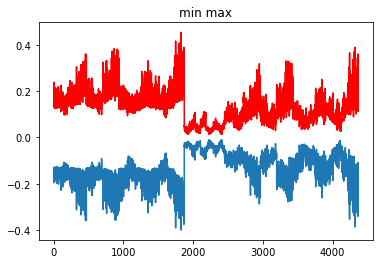

The amplitude range for different samples and classes is not uniform, so during the loop we've normalized each audio sample.
The audio samples all have the same duration: 88201 samples
Audio samples have been recorded with sampling frequency of:  44100.0 Hz


In [113]:
plt.plot(min_max[:,0])
plt.plot(min_max[:,1], 'r')
plt.title('min max')
plt.show()

print("The amplitude range for different samples and classes is not uniform, so during the loop we've normalized each audio sample.")
print('The audio samples all have the same duration: {} samples'.format(int(np.unique(length)[0])))
print("Audio samples have been recorded with sampling frequency of: ", *np.unique(fs_sample), "Hz")

# Train-Test Split

<font size =4>Now we __split the dataset in two parts__: <br>
- one for __training__ the model, 
- the other one for __testing__ the trained model at the very end of the process.</font>

In [114]:
X_train,X_test,y_train,y_test = train_test_split(features, labels, test_size = 0.20, random_state=42)
print(X_train.shape, X_test.shape)

(3494, 365) (874, 365)


# Features Normalization



In [115]:
mms = MinMaxScaler()
feat_norm = scale.minmax_scale(features)
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

# Features Selection
<font size=4>Let's use __SelectkBest feature selection algorhythm__ on the __training set__ to extract the K-Best features for our classification problem</font>

In [116]:
k_sel = 3
features_selector = SelectKBest(chi2, k=k_sel)
X_train_sel_features = features_selector.fit_transform(X_train_norm, y_train)
selected_columns = features_selector.get_support(indices=True)
print(selected_columns)

X_test_sel_features = features_selector.transform(X_test_norm)

[350 352 364]


# Visualizing the Features
<font size=4>Let's try to visualize some patterns on the original dataset <br>(still sorted by classes, unlike the Train-Test sets, which are shuffled) <br> through a __features-samples plot.__</font>



## Visualizing all the features

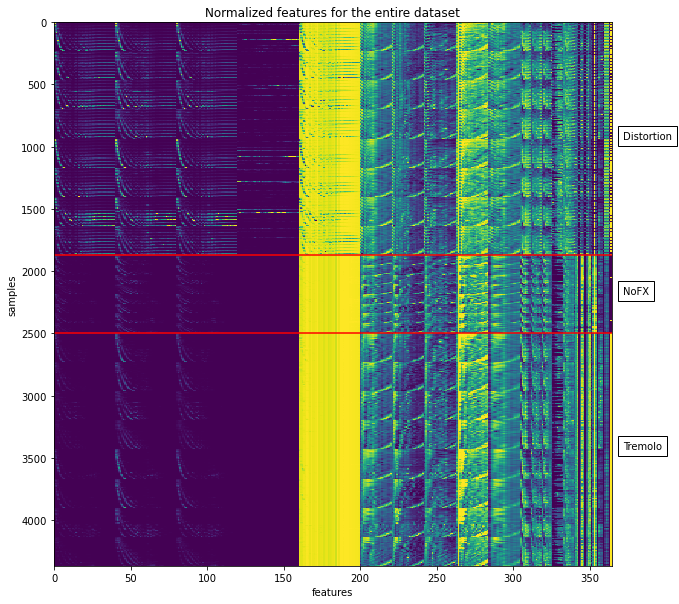

In [117]:
plt.figure(figsize=(10, 10))
plt.imshow(feat_norm,interpolation='none')
plt.xlabel('features')
plt.ylabel('samples')
plt.axis('auto')
plt.title('Normalized features for the entire dataset')

for index in range(0,len(classes), 1):
    # plot orizontal line for visual classes separation 
    if index<len(classes)-1: plt.axhline(y=bound_index[index+1], color='r', linestyle='-') # avoid printing the last line
    plt.text(feat_norm.shape[1]+7,(bound_index[index+1]+bound_index[index])/2,classes[index], bbox={'facecolor':'w','pad':5},ha='left')


plt.show()

## Visualizing just the selected features

(4368, 3)


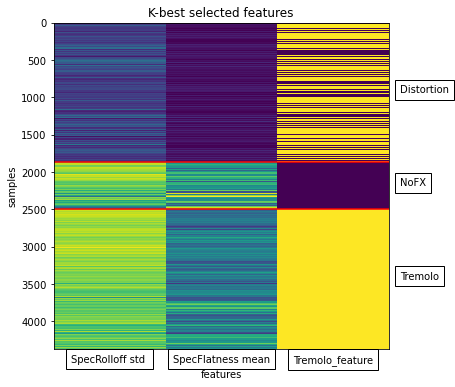

The 3 selected Features are 
['SpecRolloff std ' 'SpecFlatness mean' 'Tremolo_feature']


In [118]:
features_selected = feat_norm[:,selected_columns]
print(features_selected.shape)
plt.figure(figsize=(6, 6))
plt.imshow(features_selected,interpolation='none')
plt.xlabel('features')
plt.ylabel('samples')
plt.axis('auto')
plt.title('K-best selected features')


for index in range(0,len(classes), 1):
    # plot orizontal line for visual classes separation 
    if index<len(classes)-1: plt.axhline(y=bound_index[index+1], color='r', linestyle='-') # avoid printing the last line
    plt.text(features_selected.shape[1]-0.4,(bound_index[index+1]+bound_index[index])/2,classes[index], bbox={'facecolor':'w','pad':5},ha='left')

    
for index in range(0,k_sel, 1):
    # plot orizontal line for visual classes separation 
    plt.text(index,features_selected.shape[0]+70,np.array(featureList)[features_selector.get_support()][index], bbox={'facecolor':'w','pad':5},ha='center',va='top')

plt.xticks(np.arange(0, features_selected.shape[1]))
plt.show()

print("The {} selected Features are ".format(k_sel))
print(format(np.array(featureList)[features_selector.get_support()]))

# <font size=6> Model Choice </font>



<font size=4>We'll train <font color=red>__two classifiers__</font> :

- the __first__ is trained with __all the computed features__

- the __second__ one is trained with just the __best features selected__ by SelectKbest algorhythm.</font>

*** 


 <font size=4>Through __GridSearchCV__ we scan and try different classifiers with different parameters,<br> then we will choose the configuration that yields the best mean score in terms of __cross-validation accuracy__.
<br>We now create a dictionary to use for __model selection__ and __hyper-parameters tuning__.</font>

In [119]:
model_params = {
    'SVM': {
        'model': SVC(class_weight = 'balanced'),
        'params': {
        'C': [1,10,100],
        'kernel': ['rbf', 'linear'],
        'gamma' : [0.01, 0.05, 0.1, 0.5, 1]
        }
    },
    
    'Random_Forest': {
        'model': RandomForestClassifier(class_weight = 'balanced'),
        'params': {
            'max_depth': [5,10,15],
            'n_estimators':[1,10,20,50,100]
        }
    },
    
    'Logistic_Regression':{
        'model': LogisticRegression(solver='liblinear', multi_class= 'auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    
    'KNN':{
        'model': KNeighborsClassifier(n_jobs = -1),
        'params': {
            'n_neighbors' : [11,15,21,25,31,35],
            'metric' : ['minkowski', 'euclidean', 'manhattan']
        }
    },
    
    'Decision_Tree': {
        'model': DecisionTreeClassifier(class_weight = 'balanced' ),
        'params': {
            'max_depth': [5,10,15]
        }
    }
    

    
}

In [120]:
#function to choose the best classifier based on runtime model selection
def choose_best_classifier(classifier_type, model_params):

    if (classifier_type == "SVM"):
        clf = SVC(**model_params, class_weight = 'balanced', probability=True)
    
    elif (classifier_type == "Random_Forest"):
        clf = RandomForestClassifier(**model_params, class_weight = 'balanced')
        
    elif (classifier_type == "Logistic_Regression"):
        clf = LogisticRegression(**model_params, solver='liblinear', multi_class= 'auto')
    
    elif (classifier_type == "KNN"):
        clf = KNeighborsClassifier(**model_params,n_jobs = -1)
    
    elif (classifier_type == "Decision_Tree"):
        clf = DecisionTreeClassifier(**model_params,class_weight = 'balanced' )
        
    return clf
    





##  <br><font size=6> First Model  </font> <br> <font size=6> Trained with <br>all the features  </font>


<font size=4> __GridSearchCV:__  </font>
***
<font size=4>
- Classifier Choice <br>
- Hyper-parameters Tuning <br>
- Training
    </font> 

In [121]:
all_scores = []

prog_bar = tqdm(desc='Computing scores')
prog_bar.reset(total=len(model_params.items()))

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv = 5, return_train_score = False)
    clf.fit(X_train_norm, y_train) #Training the specific classifier
    all_scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    prog_bar.update()
    
prog_bar.refresh()

Computing scores: 0it [00:00, ?it/s]

True

<font size=4> __Sorting__ the classifiers from _best_ score to _worst_ and <br> choosing __the_best one as our model:__   </font>

In [122]:
all_sorted_scores = sorted(all_scores, key=lambda k: k['best_score'], reverse=True) #sorting the models based on best accuracy score
df1 = pd.DataFrame(all_sorted_scores, columns = ['model', 'best_score', 'best_params'])

all_classifier_type = all_sorted_scores[0]['model'] #let's choose the best classifier

all_model_params = all_sorted_scores[0]['best_params'] #let's extract the best parameters

<font size=5> __Best Classifier__ and __Best Hyper-parameters__ </font> <br> <font size=4.5> **_[all features model]_** </font>

In [123]:
print("Best classifier based on cross-validation score  : ", format(all_classifier_type) )
print("Best Parameters coming from GridSearch hyperparameters tuning", format(all_model_params) )
df1

Best classifier based on cross-validation score  :  SVM
Best Parameters coming from GridSearch hyperparameters tuning {'C': 100, 'gamma': 0.05, 'kernel': 'rbf'}


,model,best_score,best_params
0,SVM,0.998569,"{'C': 100, 'gamma': 0.05, 'kernel': 'rbf'}"
1,Logistic_Regression,0.997138,{'C': 1}
2,Decision_Tree,0.996852,{'max_depth': 15}
3,Random_Forest,0.994562,"{'max_depth': 15, 'n_estimators': 50}"
4,KNN,0.979394,"{'metric': 'minkowski', 'n_neighbors': 11}"


<font size=5> __Testing:__   </font> <br> <font size=4.5> **_[all features model]_** </font>
*** 
<font size=4>     Feeding our __Test-Set__ into our trained Model <br>and evaluating its __performances__ according to different __metrics__. </font>

In [124]:
all_feat_clf = choose_best_classifier(all_classifier_type, all_model_params)
all_feat_clf.fit(X_train_norm, y_train)
accuracy_all_feat = all_feat_clf.score(X_test_norm, y_test)
print("The accuracy considering all the features is",format(accuracy_all_feat))

The accuracy considering all the features is 0.9977116704805492


In [125]:
from sklearn.metrics import classification_report
#y_true = y_test
y_all_pred = all_feat_clf.predict(X_test_norm)
target_names = ['class Distortion', 'class NoFX', 'class Tremolo']
print(classification_report(y_test, y_all_pred, target_names=target_names))

                  precision    recall  f1-score   support

class Distortion       1.00      1.00      1.00       414
      class NoFX       0.99      0.99      0.99       112
   class Tremolo       1.00      1.00      1.00       348

        accuracy                           1.00       874
       macro avg       1.00      1.00      1.00       874
    weighted avg       1.00      1.00      1.00       874



<font size=5>__Confusion Matrix__</font> <br> <font size=4.5> **_[all features model]_** </font>

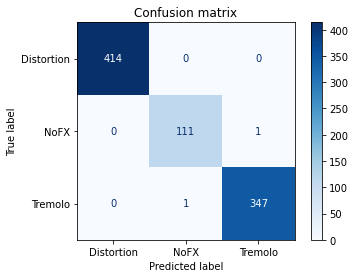

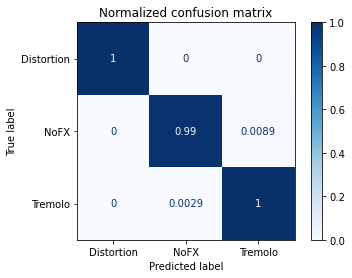

In [126]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

titles_options = [("Confusion matrix", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(all_feat_clf, X_test_norm, y_test,
                                 display_labels=classes,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    #print(title)
    #print(disp.confusion_matrix)

plt.show()

##   <br><font size=6> Second Model  </font> <br> <font size=6> Trained with <br> the K-Best <br>Selected Features  </font>

<font size=4> __GridSearchCV:__  </font>
***
<font size=4>
- Classifier Choice <br>
- Hyper-parameters Tuning <br>
- Training
    </font>



In [127]:
sel_scores = []

prog_bar = tqdm(desc='Computing scores')
prog_bar.reset(total=len(model_params.items()))

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv = 5, return_train_score = False)
    clf.fit(X_train_sel_features, y_train) #Training
    sel_scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    prog_bar.update()
    
prog_bar.refresh()

Computing scores: 0it [00:00, ?it/s]

True

<font size=4> __Sorting__ the classifiers from _best_ score to _worst_ and <br> choosing __the_best one as our model:__   </font>

In [128]:
sel_sorted_scores = sorted(sel_scores, key=lambda k: k['best_score'], reverse=True) 
df2 = pd.DataFrame(sel_sorted_scores, columns = ['model', 'best_score', 'best_params'])
sel_classifier_type = sel_sorted_scores[0]['model']
sel_model_params = sel_sorted_scores[0]['best_params']

<font size=5> __Best Classifier__ and __Best Hyper-parameters__ </font> <br> <font size=4.5> **_[K-Best Features Model]_** </font>

In [129]:
print("Best classifier based on cross-validation score  : ", format(sel_classifier_type) )
print("Best Parameters coming from GridSearch hyperparameters tuning", format(sel_model_params) )
df2

Best classifier based on cross-validation score  :  SVM
Best Parameters coming from GridSearch hyperparameters tuning {'C': 1, 'gamma': 0.01, 'kernel': 'linear'}


,model,best_score,best_params
0,SVM,0.997138,"{'C': 1, 'gamma': 0.01, 'kernel': 'linear'}"
1,Random_Forest,0.997138,"{'max_depth': 5, 'n_estimators': 50}"
2,Logistic_Regression,0.997138,{'C': 1}
3,KNN,0.997138,"{'metric': 'minkowski', 'n_neighbors': 11}"
4,Decision_Tree,0.996852,{'max_depth': 5}


<font size=5> __Testing:__   </font> <br> <font size=4.5> **_[K-Best Features Model]_** </font>
*** 
<font size=4>     Feeding our __Test-Set__ into our trained Model <br>and evaluating its __performances__ according to different __metrics__. </font>

In [130]:
sel_feat_clf = choose_best_classifier(sel_classifier_type,sel_model_params )
sel_feat_clf.fit(X_train_sel_features, y_train)
accuracy_sel_feat = sel_feat_clf.score(X_test_sel_features, y_test)
print("The accuracy considering just", format(k_sel), "features case is",format(accuracy_sel_feat))

The accuracy considering just 3 features case is 0.9977116704805492


In [131]:
y_sel_pred = sel_feat_clf.predict(X_test_sel_features)
target_names = ['class Distortion', 'class NoFX', 'class Tremolo']
print(classification_report(y_test, y_sel_pred, target_names=target_names))

                  precision    recall  f1-score   support

class Distortion       1.00      1.00      1.00       414
      class NoFX       1.00      0.99      1.00       112
   class Tremolo       1.00      1.00      1.00       348

        accuracy                           1.00       874
       macro avg       1.00      1.00      1.00       874
    weighted avg       1.00      1.00      1.00       874



<font size=5>__Confusion Matrix__</font> <br> <font size=4.5> **_[K-Best Features Model]_** </font>

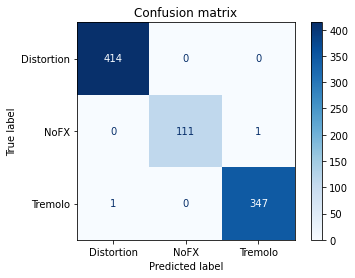

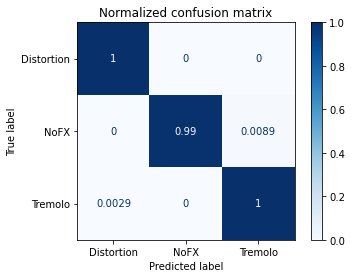

In [132]:
titles_options = [("Confusion matrix", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(sel_feat_clf, X_test_sel_features, y_test,
                                 display_labels=classes,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    #print(title)
    #print(disp.confusion_matrix)

plt.show()

##   <br><font size=6> Scatter plot  </font> <br> <font size=6> of the <br> the 3 K-Best <br>Selected Features  </font>

In [133]:
# run this cell for the interactive version of the 3d graph
%matplotlib

Using matplotlib backend: Qt5Agg


In [134]:
# this will make the graph appear on the notebook itself
%matplotlib inline

<Figure size 432x288 with 0 Axes>

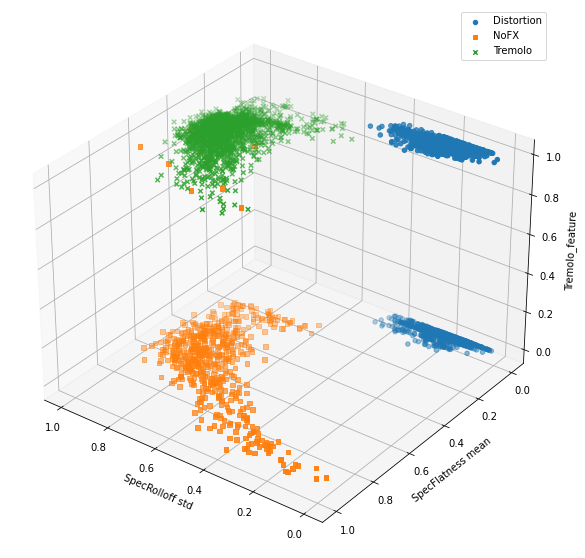

In [135]:
fig = plt.figure()
plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
# %matplotlib

marker = ['o', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd', '.'];

## compute starting and ending indexes for each class
bound_index = [0];
for i in range(len(number_file)):
    bound_index.append(np.sum(number_file[0:i+1]))
    
    
for index, sound_class in enumerate(classes):
    ax.scatter3D(features_selected[bound_index[index]:bound_index[index+1]-1,0],
                 features_selected[bound_index[index]:bound_index[index+1]-1,1],
                 features_selected[bound_index[index]:bound_index[index+1]-1,2], marker=marker[index], label=sound_class ,cmap='Greens');

ax.view_init(31,127)


ax.set_xlabel(np.array(featureList)[features_selector.get_support()][0])
ax.set_ylabel(np.array(featureList)[features_selector.get_support()][1])
ax.set_zlabel(np.array(featureList)[features_selector.get_support()][2])

plt.legend(numpoints=1)

plt.show();